В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
import os
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: andrikoks
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 18.5MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu/bank-customer-churn-prediction-dlu.zip to ./bank-customer-churn-prediction-dlu


In [5]:
data_dir = '/content/bank-customer-churn-prediction-dlu'

In [6]:
cd bank-customer-churn-prediction-dlu/

/content/bank-customer-churn-prediction-dlu


In [7]:
ls

sample_submission.csv  test.csv  train.csv


In [8]:
bank_df = pd.read_csv('train.csv')
bank_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
target = bank_df['Exited']

In [11]:
train_df, val_df = train_test_split(bank_df, test_size=0.25, random_state=42, stratify=target)
#target_for_split = train_val_df['Exited'] #створюю змінну-масив, яка використовується лише для рівномрного розподілу на тренувальний і валідаційний масив
#train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify=target_for_split)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [12]:
input_cols = list(bank_df.columns)[1:-1]
target_col = 'Exited'

In [13]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [14]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [18]:
train_inputs

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,15679299.0,Toscani,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,15804862.0,Kuo,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,15613140.0,Ejimofor,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,15651955.0,Onochie,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,15768471.0,Chukwuemeka,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88
...,...,...,...,...,...,...,...,...,...,...,...,...
9493,15711299.0,Onyekachi,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
7687,15641411.0,McGregor,645.0,Spain,Male,33.0,3.0,87541.06,1.0,1.0,0.0,135077.01
8143,15585192.0,Hsia,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29
11512,15694450.0,Onuora,590.0,Spain,Male,42.0,7.0,0.00,2.0,0.0,0.0,72643.95


In [19]:
train_targets[:3]

8263     0.0
14199    1.0
1856     0.0
Name: Exited, dtype: float64

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [17]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [20]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols

(['CustomerId',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [21]:
train_inputs[numeric_cols].describe().round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,15691021.87,658.99,37.69,5.02,42952.89,1.59,0.79,0.49,117904.96
std,150609.24,72.12,8.14,2.78,59923.39,0.53,0.41,0.50,45553.03
min,1581102.00,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,15635241.00,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83155.87
50%,15690134.00,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123587.94
75%,15757396.25,709.00,42.00,7.00,109863.19,2.00,1.00,1.00,156774.94
max,15815690.00,850.00,72.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [22]:
bank_df.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Пустих клітинок немає

In [23]:
train_inputs[categorical_cols].nunique()

Surname      720
Geography      3
Gender         2
dtype: int64

Думаю, що колонки 'Surname' та 'Customer ID' варто видалити з тренувальних і валідаційних датасетів, оскільки вони не мали б якось впливати на таргет.

In [24]:
train_inputs.drop(columns=['CustomerId', 'Surname'], inplace=True, axis=1)
val_inputs.drop(columns=['CustomerId', 'Surname'], inplace=True, axis=1)
display(train_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88


In [25]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols #перевизначаю категоріальні та номерні колонки

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

In [26]:
train_inputs[numeric_cols].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,35.0,7.0,0.00,2.0,1.0,0.0,100423.88


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

Масштабуємо дані

In [29]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [30]:
display(train_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109


In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [33]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [34]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


як заповняться нові числові колонки, створені з категоріальних

In [35]:
encoder.transform(train_inputs[categorical_cols])[:5]

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

Кодую категоріальні колонки

In [36]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [37]:
display(train_inputs[:5]), display(val_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1855,0.267303,France,Male,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,0.398568,Germany,Male,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,0.453461,France,Male,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,0.396181,France,Male,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,0.758950,Spain,Female,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0


(None, None)

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [38]:
!pip install pyarrow --quiet

In [39]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')

In [40]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')

In [41]:
train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]

In [42]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 15)
train_targets: (11250,)
val_inputs: (3750, 15)
val_targets: (3750,)


In [43]:
!ls

sample_submission.csv  train.csv	     train_targets.parquet  val_targets.parquet
test.csv	       train_inputs.parquet  val_inputs.parquet


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear')

In [46]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [47]:
print(numeric_cols + encoded_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [48]:
model.coef_.round(2)

array([[-0.83,  8.16, -0.09, -1.09, -3.93, -0.18, -1.24,  0.18, -0.97,
         0.6 , -1.05, -0.27, -1.15]])

In [49]:
print(model.intercept_)

[-1.42098682]


In [50]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [51]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


In [52]:
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
train_targets

8263     0.0
14199    1.0
1856     0.0
3013     0.0
8266     0.0
        ... 
9493     0.0
7687     1.0
8143     0.0
11512    0.0
1292     1.0
Name: Exited, Length: 11250, dtype: float64

(array([5945., 1830.,  826.,  589.,  448.,  392.,  295.,  309.,  332.,
         284.]),
 array([0.00142288, 0.10051531, 0.19960775, 0.29870018, 0.39779261,
        0.49688505, 0.59597748, 0.69506991, 0.79416234, 0.89325478,
        0.99234721]),
 <BarContainer object of 10 artists>)

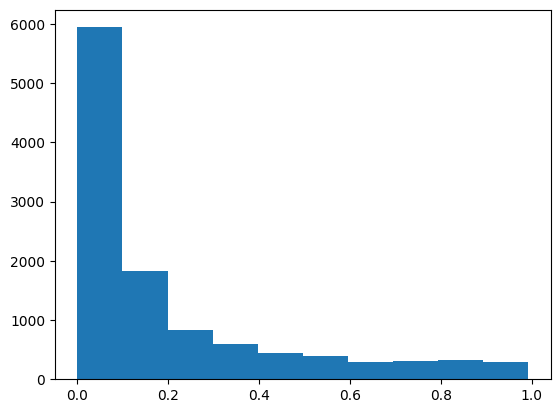

In [54]:
train_probs = model.predict_proba(X_train)
train_probs
plt.hist(train_probs[:,1])

In [55]:
train_targets.value_counts(normalize=True)

Exited
0.0    0.796533
1.0    0.203467
Name: proportion, dtype: float64

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [57]:
accuracy_score(train_targets, train_preds)

0.8747555555555555

In [58]:
confusion_matrix(train_targets, train_preds)

array([[8600,  361],
       [1048, 1241]])

In [61]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.4f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.8826


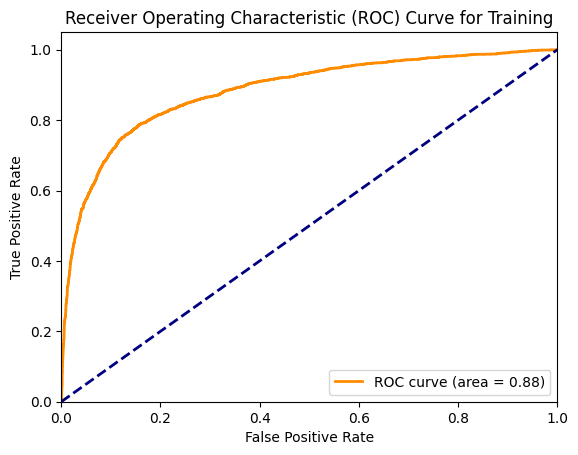

AUROC for Val: 0.8799


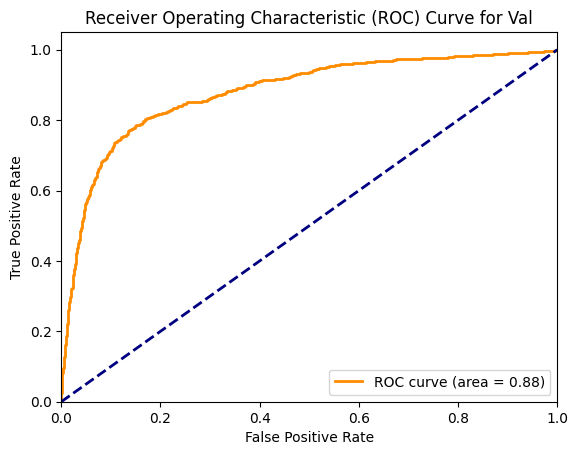

In [62]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

In [63]:
from sklearn.metrics import f1_score

In [64]:
preds = model.predict(X_train)
preds[:5], train_targets[:5]

(array([0., 0., 0., 0., 0.]),
 8263     0.0
 14199    1.0
 1856     0.0
 3013     0.0
 8266     0.0
 Name: Exited, dtype: float64)

In [65]:
f1_score(train_targets, preds, pos_label=1.0)

0.6378822924698021

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [66]:
def all_zero(inputs):
    return np.full(len(inputs), 0.0)

In [67]:
all_zero = all_zero(X_train)

all_zero

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
train_targets

8263     0.0
14199    1.0
1856     0.0
3013     0.0
8266     0.0
        ... 
9493     0.0
7687     1.0
8143     0.0
11512    0.0
1292     1.0
Name: Exited, Length: 11250, dtype: float64

In [69]:
accuracy_score(train_targets, all_zero)

0.7965333333333333

Якість створеної моделі точно краща ніж втупу вибрати переважаюче значення таргета, яке має досить велике значення 0.7965.
Модель передбачає значення із точністю **0.88** по AUROC для тренувальних та валідаційних даних.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [70]:
import joblib

In [71]:
log_reg = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [72]:
joblib.dump(log_reg, 'log_reg')

['log_reg']

In [73]:
ls

log_reg                test.csv   train_inputs.parquet   val_inputs.parquet
sample_submission.csv  train.csv  train_targets.parquet  val_targets.parquet


In [74]:
model_2 = joblib.load('log_reg')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [75]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [ ]:
#predict_input(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [76]:
test_raw_df = pd.read_csv('test.csv')
test_raw_df[:1]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86


In [97]:
#predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

array([0.07799743, 0.0356206 , 0.16261815, ..., 0.01772967, 0.15569096,
       0.09023871])

In [77]:
prob = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

prob

array([0.07494963, 0.03476697, 0.15096065, ..., 0.01850099, 0.15231631,
       0.09173931])

In [78]:
test_raw_df['Exited'] = prob

In [79]:
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.222222,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.074950
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.388889,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.034767
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.462963,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.150961
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.500000,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.196458
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.462963,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055247


In [80]:
prob.shape

(10000,)

f12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [81]:
submission = pd.read_csv('sample_submission.csv')

submission[:5]

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [82]:
submission.shape

(10000, 2)

In [83]:
submission.set_index('id', inplace=True)
test_raw_df.set_index('id', inplace=True)

In [84]:
submission.update(test_raw_df[['Exited']])

submission.reset_index(inplace=True)
test_raw_df.reset_index(inplace=True)


submission[:5]

,id,Exited
0,15000,0.074950
1,15001,0.034767
2,15002,0.150961
3,15003,0.196458
4,15004,0.055247


In [85]:
submission.to_csv('submission_log_reg.csv', index=False)

In [86]:
submission.describe()

,id,Exited
count,10000.00000,10000.000000
mean,19999.50000,0.212722
std,2886.89568,0.255538
min,15000.00000,0.000688
25%,17499.75000,0.034802
50%,19999.50000,0.094728
75%,22499.25000,0.285268
max,24999.00000,0.993969
